In [ ]:
import pandas as pd
import os

def concatenate_testosterone_csv_files_corrected(directory_path):
    all_files = os.listdir(directory_path)
    testosterone_csv_files = []

    for file_name in all_files:
        if "testosterone" in file_name.lower() and file_name.lower().endswith(".csv"):
            testosterone_csv_files.append(os.path.join(directory_path, file_name))

    if not testosterone_csv_files:
        print(f"No CSV files containing 'testosterone' found in: {directory_path}")
        return None

    print(f"Found {len(testosterone_csv_files)} matching CSV files:")
    for f in testosterone_csv_files:
        print(f"- {os.path.basename(f)}")

    list_of_dfs = []
    for file_path in testosterone_csv_files:
        try:
            df = pd.read_csv(file_path, skiprows=2)
            if 'Standard Units' in df.columns:
                pass
            else:
                print(f"Warning: 'Standard Units' column not found in {os.path.basename(file_path)}")

            list_of_dfs.append(df)
            print(f"Successfully read: {os.path.basename(file_path)}")
        except pd.errors.EmptyDataError:
            print(f"Warning: {os.path.basename(file_path)} is empty after skipping rows. Skipping.")
            continue
        except Exception as e:
            print(f"Error reading {os.path.basename(file_path)}: {e}")
            continue

    if not list_of_dfs:
        print("No DataFrames were successfully read for concatenation.")
        return None

    concatenated_df = pd.concat(list_of_dfs, ignore_index=True)
    print("\nConcatenation complete!")
    print(f"Shape of the concatenated DataFrame: {concatenated_df.shape}")

    return concatenated_df

target_directory = r"../pubchem_data/testosterone"

tes_df = concatenate_testosterone_csv_files_corrected(target_directory)

if tes_df is not None:
    print("\nFirst 5 rows of the concatenated DataFrame:")
    print(tes_df.head())
    print("\nConcatenated DataFrame Info:")
    tes_df.info()


Found 22 matching CSV files:
- AID_1217258_datatable_all_testosterone.csv
- AID_1383786_datatable_all_testosterone_20.csv
- AID_1388759_datatable_all_testosterone.csv
- AID_1474684_datatable_all_testosterone.csv
- AID_1606763_datatable_all_testosterone.csv
- AID_1668680_datatable_all_testosterone_10.csv
- AID_1849082_datatable_all_testosterone_5~10.csv
- AID_1858251_datatable_all_testosterone_10.csv
- AID_1974539_datatable_all_Testosterone_10.csv
- AID_2023662_datatable_all_testosterone.csv
- AID_315656_datatable_all_testosterone.csv
- AID_480236_datatable_all_testosterone_5~10.csv
- AID_568018_datatable_all_testosterone.csv
- AID_603396_datatable_all_testosterone.csv
- AID_603397_datatable_all_testosterone.csv
- AID_606110_datatable_all_testosterone.csv
- AID_650573_datatable_all_testosterone.csv
- AID_657031_datatable_all_testosterone.csv
- AID_698126_datatable_all_testosterone.csv
- AID_728065_datatable_all_testosterone_5~10.csv
- AID_781289_datatable_all_testosterone.csv
- AID_7812

In [ ]:
tes_df.head()

,RESULT_DESCR,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Standardized activity type (e.g. IC50 rather than Ic-50/Ic50/ic50/ic-50),"Qualifier (e.g. >, <, =) for 'Standard Value'",Standardized activity value transformed to common units: e.g. mM concentrations converted to nM,Selected units for 'Standard Type': e.g. concentrations are in nM,Additional comments
0,1,103621127,10077130,CCOC(=O)N[C@@H]1CC[C@@H]2[C@@H](C1)C[C@@H]3[C@...,Unspecified,NaN,NaN,NaN,Inhibition,=,76.0,%,NaN
1,1,404673551,142296515,CC1C(=O)N(C2=C(N1C3CC3)C=C(C=C2)C(=O)N4CCC5=CC...,Unspecified,NaN,NaN,NaN,Inhibition,=,17.0,%,NaN
2,2,404673625,142296582,CC1C(=O)N(C2=C(N1C3CC3)C=C(C=C2)C(=O)N4CCC5=C(...,Unspecified,NaN,NaN,NaN,Inhibition,=,22.0,%,NaN
3,3,404673632,142296525,CC1C(=O)N(C2=C(N1C3CC3)C=C(C=C2)C(=O)N(C)C4=CC...,Unspecified,NaN,NaN,NaN,Inhibition,=,3.0,%,NaN
4,4,404673968,142296607,CC1C(=O)N(C2=C(N1C3CC3)C=C(C=C2)C(=O)N4CCC5=C4...,Unspecified,NaN,NaN,NaN,Inhibition,=,17.0,%,NaN


In [ ]:
tes_df.columns

Index(['RESULT_DESCR', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Standardized activity type (e.g. IC50 rather than Ic-50/Ic50/ic50/ic-50)',
       'Qualifier (e.g. >, <, =) for 'Standard Value'',
       'Standardized activity value transformed to common units: e.g. mM concentrations converted to nM',
       'Selected units for 'Standard Type': e.g. concentrations are in nM',
       'Additional comments'],
      dtype='object')

In [ ]:
rename_map = {
    'Unnamed: 3': 'SMILES',
    'Standardized activity type (e.g. IC50 rather than Ic-50/Ic50/ic50/ic-50)': 'Type',
    'Qualifier (e.g. >, <, =) for \'Standard Value\'': 'Qualifier',
    'Standardized activity value transformed to common units: e.g. mM concentrations converted to nM': 'Inhibition',
    "Selected units for 'Standard Type': e.g. concentrations are in nM":"Units"
}

tes_df = tes_df.rename(columns=rename_map, )

print("New column names after renaming:")
print(tes_df.columns)

print("\nFirst 5 rows of the DataFrame with renamed columns:")
print(tes_df.head())

New column names after renaming:
Index(['RESULT_DESCR', 'Unnamed: 1', 'Unnamed: 2', 'SMILES', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Type', 'Qualifier',
       'Inhibition', 'Units', 'Additional comments'],
      dtype='object')

First 5 rows of the DataFrame with renamed columns:
   RESULT_DESCR  Unnamed: 1  Unnamed: 2  \
0             1   103621127    10077130   
1             1   404673551   142296515   
2             2   404673625   142296582   
3             3   404673632   142296525   
4             4   404673968   142296607   

                                              SMILES   Unnamed: 4  Unnamed: 5  \
0  CCOC(=O)N[C@@H]1CC[C@@H]2[C@@H](C1)C[C@@H]3[C@...  Unspecified         NaN   
1  CC1C(=O)N(C2=C(N1C3CC3)C=C(C=C2)C(=O)N4CCC5=CC...  Unspecified         NaN   
2  CC1C(=O)N(C2=C(N1C3CC3)C=C(C=C2)C(=O)N4CCC5=C(...  Unspecified         NaN   
3  CC1C(=O)N(C2=C(N1C3CC3)C=C(C=C2)C(=O)N(C)C4=CC...  Unspecified         NaN   
4  CC1C(=O)N(C2=C(N1C3CC3)C=C

In [ ]:
pre_df = tes_df[['SMILES', 'Type', 'Inhibition', 'Units']]
pre_df.head()

,SMILES,Type,Inhibition,Units
0,CCOC(=O)N[C@@H]1CC[C@@H]2[C@@H](C1)C[C@@H]3[C@...,Inhibition,76.0,%
1,CC1C(=O)N(C2=C(N1C3CC3)C=C(C=C2)C(=O)N4CCC5=CC...,Inhibition,17.0,%
2,CC1C(=O)N(C2=C(N1C3CC3)C=C(C=C2)C(=O)N4CCC5=C(...,Inhibition,22.0,%
3,CC1C(=O)N(C2=C(N1C3CC3)C=C(C=C2)C(=O)N(C)C4=CC...,Inhibition,3.0,%
4,CC1C(=O)N(C2=C(N1C3CC3)C=C(C=C2)C(=O)N4CCC5=C4...,Inhibition,17.0,%


In [ ]:
pre_df.isnull().sum()

SMILES        0
Type          0
Inhibition    5
Units         5
dtype: int64

In [ ]:
print("\nRows with any null values:")
print(pre_df[pre_df.isnull().any(axis=1)])



Rows with any null values:
                                                SMILES        Type  \
53   C1COC2=C([C@@H]1C3=C(C=C(C=C3)C(F)(F)F)C4=NC=C...  Inhibition   
64   C1COC2=C([C@@H]1C3=C(C=C(C=C3)C(F)(F)F)N4C=CN=...  Inhibition   
279  CC(C1=CC=CC=C1)NS(=O)(=O)CC2=CC3=C(C=C2)C=CC4=...  Inhibition   
285  CN1C=C(C=N1)C2=CC3=C(C=CC4=C(C3=O)C=C(C=C4)CS(...  Inhibition   
288  CCN(CC1=CC=CC=N1)S(=O)(=O)CC2=CC3=C(C=C2)C=CC4...  Inhibition   

     Inhibition Units  
53          NaN   NaN  
64          NaN   NaN  
279         NaN   NaN  
285         NaN   NaN  
288         NaN   NaN  


In [ ]:
pre_df = pre_df.dropna()

In [ ]:
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, 0 to 326
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SMILES      322 non-null    object 
 1   Type        322 non-null    object 
 2   Inhibition  322 non-null    float64
 3   Units       322 non-null    object 
dtypes: float64(1), object(3)
memory usage: 12.6+ KB


In [ ]:
pre_df = pre_df[pre_df['Inhibition'] >= 0]
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318 entries, 0 to 326
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SMILES      318 non-null    object 
 1   Type        318 non-null    object 
 2   Inhibition  318 non-null    float64
 3   Units       318 non-null    object 
dtypes: float64(1), object(3)
memory usage: 12.4+ KB


In [ ]:
pre_df['Type'].value_counts()

Type
Inhibition    318
Name: count, dtype: int64

In [ ]:
print(f"중복된 행이 존재합니까? {pre_df.duplicated().any()}")

중복된 행이 존재합니까? True


In [ ]:
outliers = pre_df[pre_df['Inhibition'] > 100]

num_outliers = outliers.shape[0]

print(f"\n'Inhibition' 값이 100%를 초과하는 행의 개수: {num_outliers}개")


'Inhibition' 값이 100%를 초과하는 행의 개수: 5개


In [ ]:
if num_outliers > 0:
    print("\n100%를 초과하는 'Inhibition' 값의 행:")
    print(outliers)

    pre_df = pre_df[pre_df['Inhibition'] <= 100]
    print("\n--- Removal Complete ---")
    print(f"'Inhibition' 값이 100%를 초과하는 행의 개수: {pre_df[pre_df['Inhibition'] > 100].shape[0]}개")
    print(f"업데이트된 DataFrame의 새로운 행 개수: {pre_df.shape[0]}개")
    print("\nDataFrame after removing outliers:")
    print(pre_df)
else:
    print("\n'Inhibition' 값이 100%를 초과하는 행이 없습니다.")


100%를 초과하는 'Inhibition' 값의 행:
                                               SMILES        Type  Inhibition  \
100            CCN(CC)CCCC(C)NC1=C2C=CC(=CC2=NC=C1)Cl  Inhibition       106.0   
101      CCN(CC)CCCC(C)NC1=C2C=CC(=CC2=NC=C1)C(F)(F)F  Inhibition       113.0   
102  CCN(CC)CCCC(C)NC1=C2C=CC(=CC2=NC=C1)OC3=CC=CC=C3  Inhibition       125.0   
110     CCN(CC)CCCC(C)NC1=C2C=CC(=CC2=NC=C1)OC(F)(F)F  Inhibition       120.0   
111           CCCN(CCCNC1=C2C=CC(=CC2=NC=C1)Cl)CC3CC3  Inhibition       105.0   

    Units  
100     %  
101     %  
102     %  
110     %  
111     %  

--- Removal Complete ---
'Inhibition' 값이 100%를 초과하는 행의 개수: 0개
업데이트된 DataFrame의 새로운 행 개수: 313개

DataFrame after removing outliers:
                                                SMILES        Type  \
0    CCOC(=O)N[C@@H]1CC[C@@H]2[C@@H](C1)C[C@@H]3[C@...  Inhibition   
1    CC1C(=O)N(C2=C(N1C3CC3)C=C(C=C2)C(=O)N4CCC5=CC...  Inhibition   
2    CC1C(=O)N(C2=C(N1C3CC3)C=C(C=C2)C(=O)N4CCC5=C(...  Inhibition   

In [ ]:
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313 entries, 0 to 326
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SMILES      313 non-null    object 
 1   Type        313 non-null    object 
 2   Inhibition  313 non-null    float64
 3   Units       313 non-null    object 
dtypes: float64(1), object(3)
memory usage: 12.2+ KB


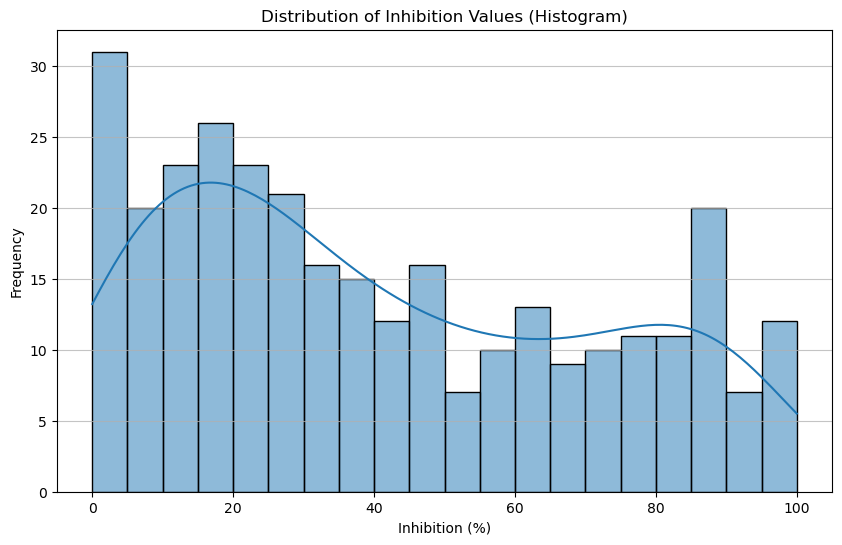

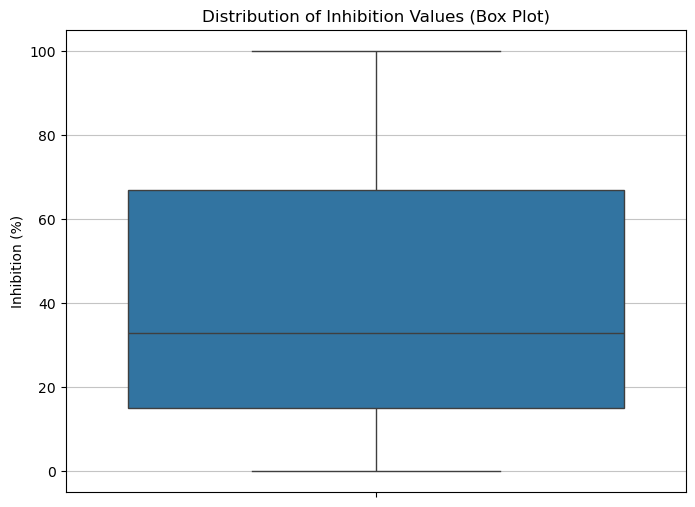

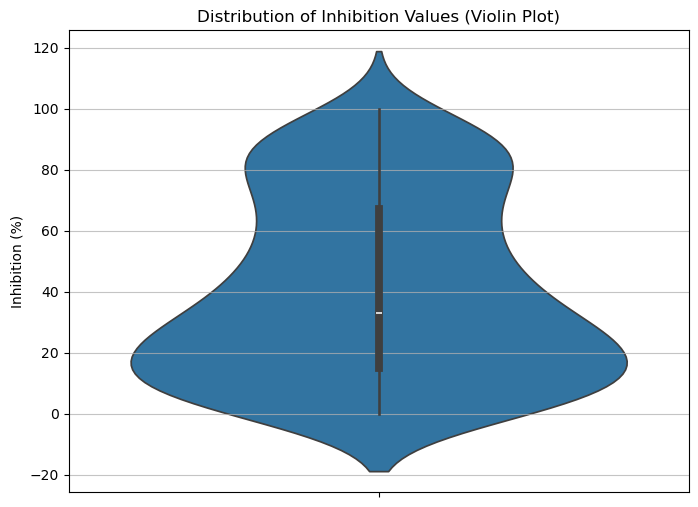


Basic statistics for 'Inhibition' column:
count    313.000000
mean      40.475367
std       29.702447
min        0.000000
25%       15.000000
50%       33.000000
75%       67.000000
max      100.000000
Name: Inhibition, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(pre_df['Inhibition'], bins=20, kde=True)
plt.title('Distribution of Inhibition Values (Histogram)')
plt.xlabel('Inhibition (%)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=pre_df['Inhibition'])
plt.title('Distribution of Inhibition Values (Box Plot)')
plt.ylabel('Inhibition (%)')
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(y=pre_df['Inhibition'])
plt.title('Distribution of Inhibition Values (Violin Plot)')
plt.ylabel('Inhibition (%)')
plt.grid(axis='y', alpha=0.75)
plt.show()

print("\nBasic statistics for 'Inhibition' column:")
print(pre_df['Inhibition'].describe())

In [ ]:
from rdkit import Chem

def canonicalize_smiles(smiles_series):
    """
    Canonicalizes a pandas Series of SMILES strings using RDKit.
    Returns a new Series with canonical SMILES. Invalid SMILES become None.
    """
    canonical_smiles_list = []
    for s in smiles_series:
        if pd.isna(s):
            canonical_smiles_list.append(None)
            continue
        try:
            mol = Chem.MolFromSmiles(str(s))
            if mol is not None:
                canonical_smiles_list.append(Chem.MolToSmiles(mol))
            else:
                canonical_smiles_list.append(None)
        except Exception:
            canonical_smiles_list.append(None)
    return pd.Series(canonical_smiles_list, index=smiles_series.index)

print("Canonicalizing SMILES for pre_df...")
pre_df['Canonical_Smiles'] = canonicalize_smiles(pre_df['SMILES'])

initial_pre_rows = pre_df.shape[0]
pre_df.dropna(subset=['Canonical_Smiles'], inplace=True)
if pre_df.shape[0] < initial_pre_rows:
    print(f"Removed {initial_pre_rows - pre_df.shape[0]} rows due to invalid SMILES during canonicalization.")
else:
    print("No invalid SMILES found during canonicalization.")


final_export_df = pre_df[['Canonical_Smiles', 'Inhibition']]

print("\nFinal DataFrame for export (first 5 rows):")
print(final_export_df.head())


final_export_df.to_csv(r"../processed_data/testosterone_df.csv", index = False)


Canonicalizing SMILES for pre_df...
No invalid SMILES found during canonicalization.

Final DataFrame for export (first 5 rows):
                                    Canonical_Smiles  Inhibition
0  CCOC(=O)N[C@@H]1CC[C@@H]2[C@@H](C1)C[C@H]1C(=O...        76.0
1    CC1C(=O)N(C)c2ccc(C(=O)N3CCc4ccccc43)cc2N1C1CC1        17.0
2  Cc1cccc2c1CCN2C(=O)c1ccc2c(c1)N(C1CC1)C(C)C(=O...        22.0
3     CC1C(=O)N(C)c2ccc(C(=O)N(C)c3ccccc3)cc2N1C1CC1         3.0
4  Cc1ccc2c(c1)CCN2C(=O)c1ccc2c(c1)N(C1CC1)C(C)C(...        17.0
